In [29]:
# import necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split

In [2]:
import house_sales_data as housesales

In [30]:
## Sacramento house price data; load
data = housesales.house_sales_data()
print(data.keys())

#Get the target (i.e., price) and two features
price =data["price"]
area = data["area"]
beds = data["beds"]

dict_keys(['price', 'area', 'beds', 'baths', 'condo', 'location'])


In [31]:
# Implement gradient descent (NOT SGD, just simple GD!)
def gradient_descent(X, y, max_iteration, learning_rate):
    m, n = X.shape
    theta = np.zeros(n)
    errs = np.zeros(max_iteration)

    for t in range(max_iteration):
        gradient = np.zeros(n)
        for i in range(m):
            yhat = X[i] @ theta
            errs[t] += 1/m * (yhat - y[i])**2
            for j in range(n):
                gradient[j] += 1/m * 2 * (yhat - y[i])*X[i,j]
        theta -= learning_rate * gradient
    return theta, errs


In [32]:
# Normalize data :
def normalize_data(X, y, normalize_cols):
    min_X = X[:,normalize_cols].min(axis=0)
    max_X = X[:,normalize_cols].max(axis=0)
    min_y = y.min()
    max_y = y.max()
    X[:,normalize_cols] = (X[:,normalize_cols] - min_X) / (max_X - min_X)
    y[:] = (y - min_y) / (max_y - min_y)
    return min_X, max_X, min_y, max_y



In [49]:
# Implement an evaluation metric for regression
def evaluation_metric(y,y_hat):
    s=0
    for i in range(len(y)):
        s=s+((y[i]-y_hat[i])**2)
    return s/(len(y))

In [33]:
# Prepare data this way
X_train = np.hstack((area[:,np.newaxis], beds[:,np.newaxis], np.ones(area.shape[0])[:,np.newaxis]))
y_train = price
min_X, max_X, min_y, max_y = normalize_data(X_train, y_train, [True, True, False])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
gradient_descent(X_train,y_train,100,0.1)

(array([0.3163406 , 0.17295213, 0.10848726]),
 array([0.10482456, 0.06967421, 0.05022672, 0.03943752, 0.03342278,
        0.03004125, 0.0281124 , 0.02698539, 0.02630136, 0.02586247,
        0.02555962, 0.02533265, 0.02514838, 0.02498851, 0.02484293,
        0.02470605, 0.0245748 , 0.02444743, 0.02432301, 0.02420099,
        0.02408106, 0.02396303, 0.0238468 , 0.02373229, 0.02361945,
        0.02350824, 0.02339863, 0.02329059, 0.02318409, 0.02307912,
        0.02297563, 0.02287362, 0.02277306, 0.02267393, 0.0225762 ,
        0.02247986, 0.02238488, 0.02229124, 0.02219893, 0.02210791,
        0.02201818, 0.02192972, 0.02184249, 0.02175649, 0.0216717 ,
        0.0215881 , 0.02150566, 0.02142438, 0.02134424, 0.02126521,
        0.02118728, 0.02111044, 0.02103467, 0.02095994, 0.02088626,
        0.02081359, 0.02074193, 0.02067126, 0.02060156, 0.02053283,
        0.02046504, 0.02039818, 0.02033224, 0.0202672 , 0.02020305,
        0.02013978, 0.02007737, 0.02001582, 0.0199551 , 0.0198952 ,
  

In [37]:
theta,costs=gradient_descent(X_train,y_train,500,0.1)

In [ ]:
# call gradient descent and fine-tune your learning rate:

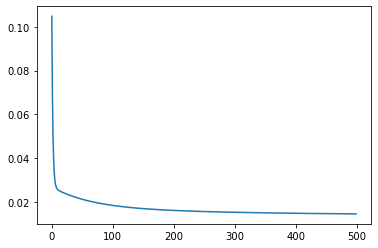

In [38]:
# plot cost vs iterations 
# note gradient descent return costs for all iterations
plt.plot(costs)

In [52]:
# print evaluation metric for test set while 
# changing max_iteration from 500 to 2000
# Note the best value of evaluation metric you get
error=[]
for i in range(500,2000,100):
    theta,err=gradient_descent(X_test,y_test,i,0.1)
    y_hat=X_test@theta
    error.append(evaluation_metric(y_test,y_hat))

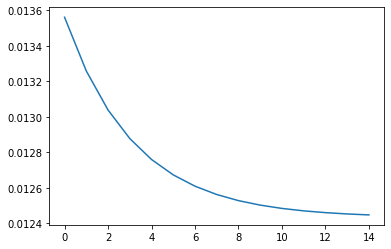

In [53]:
plt.plot(error)

In [39]:
# compare your solution with scikit-learn library
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression

In [42]:
# Create linear regression object
model=LinearRegression()


In [43]:
# Train the model using the training sets
model.fit(X_train,y_train)

LinearRegression()

In [51]:
# Predict on test set and print evaluation metric
# How much does it differ by from 
y_pred=model.predict(X_test)


In [50]:
evaluation_metric(y_test,y_pred)

0.012602503305118876

In [54]:
yhat=X_test@theta

In [55]:
evaluation_metric(y_test,yhat)

0.012446735168870371